<a href="https://colab.research.google.com/github/atikanuranidewi/Pemrograman-Python/blob/main/Tugas_Pertemuan_14_Wireless_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Tugas Python Wireless Modelling__

Nama : Atika Nurani Dewi

NIM : 1101180185

Kelas : TT-43-G7


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np

__FUNGSI__

In [20]:
#parameter

area = ['Urban','Suburban','Open']

frek = [700, 900, 1800]
tower = 80
user = 1.5 
jrk = np.arange(300, 1001, 5)
ptrans = 30000
gtrans = 10 
greceive = 2 
bw = 5000000 

NtL = lambda x : 10*np.log10(x)
LtN = lambda x : 10**(x/10)

ptrans_dbm = NtL(ptrans)

In [21]:
#FUNGSI PATHLOSS

def cos(frek,area,tower,user,jrk):
    #Frekuensi
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    #Tipe Area
    if area=='Urban' :
        Cm=0
    elif area=='Suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif area=='Open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*user-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(tower))-ahr+((44.9-6.55*np.log10(tower))*np.log10(jrk))-Cm
    
    return Lp

In [22]:
#FUNGSI DAYA TERIMA

def pterima(Lp,ptrans_dbm, gtrans,greceive):
  preceive = ptrans_dbm - Lp + gtrans + greceive
  return preceive

In [23]:
#FUNGSI SNR

def fsnr(preceive,bw):
  ang = -174 + 10*np.log10(bw)
  ang_num = LtN(ang)
  snr = preceive/ang_num
  return snr

In [24]:
#FUNGSI CELLULAR CAPACITY

def cellcapacity(j, snr, bw):
  sa = [1]
  salist = []
  reslist = []
  for ind in range(len(snr)):
    salist = sa * len(snr)
    res = salist[ind] + snr[ind]
    reslist.append(res)
  capacity = bw * np.log2(reslist)
  return capacity

In [26]:
#FUNGSI PATHLOSS 1
pathloss_urban = []
pathloss_suburban = []
pathloss_open = []

#Tipe Area Urban
def pl_urban(jrk,frek,area,tower,user):
  f = frek[2]
  tipe = area[0]
  for i in range(len(jrk)):
    urban_1800 = cos(f,tipe,tower,user,jrk)
    return urban_1800
pathloss_urban = pl_urban(jrk,frek,area,tower,user)

#Tipe Area Suburban
def pl_suburban(jrk,frek,area,tower,user):
  f = frek[2]
  tipe = area[1]
  for i in range(len(j)):
    suburban_1800 = cos(f,tipe,tower,user,jrk)
    return suburban_1800
pathloss_suburban = pl_suburban(jrk,frek,area,tower,user)

#Tipe Area Open
def pl_open(jrk,frek,area,tower,user):
  f = frek[2]
  tipe = area[2]
  for i in range(len(jrk)):
    open_1800 = cos(f,tipe,tower,user,jrk)
    return open_1800
pathloss_open = pl_open(jrk,frek,area,tower,user)

In [27]:
#FUNGSI DAYA TERIMA 1
dayaterima_urban = []
dayaterima_suburban = []
dayaterima_open = []

#Daya Terima Urban
def preceive_urban(pathloss_urban,ptrans_dbm,gtrans,greceive):
  for i in range(len(pathloss_urban)):
    dt1 = pterima(pathloss_urban,ptrans_dbm,gtrans,greceive)
    dt1_num = LtN(dt1)
    return dt1_num
dayaterima_urban = preceive_urban(pathloss_urban,ptrans_dbm,gtrans,greceive)

#Daya Terima Suburban
def preceive_suburban(pathloss_suburban,ptrans_dbm,gtrans,greceive):
  for i in range(len(pathloss_suburban)):
    dt2 = pterima(pathloss_suburban,ptrans_dbm,gtrans,greceive)
    dt2_num = LtN(dt2)
    return dt2_num
dayaterima_suburban = preceive_suburban(pathloss_suburban,ptrans_dbm,gtrans,greceive)

#Daya Terima Open
def preceive_open(pathloss_open,ptrans_dbm,gtrans,greceive):
  for i in range(len(pathloss_open)):
    dt3 = pterima(pathloss_open,ptrans_dbm,gtrans,greceive)
    dt3_num = LtN(dt3)
    return dt3_num
dayaterima_open = preceive_open(pathloss_open,ptrans_dbm,gtrans,greceive)

In [28]:
#FUNGSI SNR 1
snr_urban = []
snr_suburban = []
snr_open = []

#SNR Urban
def UrbanSNR(bw,dayaterima_urban):
  for i in range(len(dayaterima_urban)):
    Urb = fsnr(dayaterima_urban,bw)
    return Urb
snr_urban = UrbanSNR(bw,dayaterima_urban)

#SNR Suburban
def SuburbanSNR(bw,dayaterima_suburban):
  for i in range(len(dayaterima_suburban)):
    SubUrb = fsnr(dayaterima_suburban,bw)
    return SubUrb
snr_suburban = SuburbanSNR(bw,dayaterima_suburban)

#SNR Open
def OpenSNR(bw,dayaterima_open):
  for i in range(len(dayaterima_open)):
    Op = fsnr(dayaterima_open,bw)
    return Op
snr_open = OpenSNR(bw,dayaterima_open)

In [29]:
#FUNGSI CELLULAR CAPACITY 1
cellcapacity_urban = []
cellcapacity_suburban = []
cellcapacity_open = []

#Cellular Capacity Urban
def UrbanCC(jrk, snr_urban, bw):
  for i in range(len(snr_urban)):
    CCU = cellcapacity(jrk,snr_urban,bw)
  return CCU
cellcapacity_urban = UrbanCC(jrk,snr_urban,bw)

#Cellular Capacity Suburban
def SuburbanCC(jrk, snr_suburban, bw):
  for i in range(len(snr_suburban)):
    CCS = cellcapacity(jrk,snr_suburban,bw)
  return CCS
cellcapacity_suburban = SuburbanCC(jrk,snr_suburban,bw)

#Cellular Capacity Open
def OpenCC(jrk, snr_open, bw):
  for i in range(len(snr_open)):
    CCO = cellcapacity(jrk,snr_open,bw)
  return CCO
cellcapacity_open = OpenCC(jrk,snr_open,bw)

In [31]:
#FUNGSI PATHLOSS 2
pathloss_700 = []
pathloss_900 = []
pathloss_1800 = []

#Pathloss 700
def pl_700(jrk,frek,area,tower,user):
  f = frek[0]
  tipe = area[0]
  for i in range(len(jrk)):
    Urban700 = cos(f,tipe,tower,user,jrk)
    return Urban700
pathloss_700 = pl_700(jrk,frek,area,tower,user)

#Pathloss 900
def pl_900(jrk,frek,area,tower,user):
  f = frek[1]
  tipe = area[0]
  for i in range(len(jrk)):
    Urban900 = cos(f,tipe,tower,user,jrk)
    return Urban900
pathloss_900 = pl_900(jrk,frek,area,tower,user)

#Pathloss 1800
def pl_1800(jrk,frek,area,tower,user):
  f = frek[2]
  tipe = area[0]
  for i in range(len(jrk)):
    Urban1800 = cos(f,tipe,tower,user,jrk)
    return Urban1800
pathloss_1800 = pl_1800(jrk,frek,area,tower,user)

In [32]:
#FUNGSI DAYA TERIMA 2
dayaterima_700 = []
dayaterima_900 = []
dayaterima_1800 = []

#Daya Terima pada 700
def preceive_700(pathloss_700,ptrans_dbm,gtrans,greceive):
  for i in range(len(pathloss_700)):
    dt3 = pterima(pathloss_700,ptrans_dbm,gtrans,greceive)
    dt3_num = LtN(dt3)
    return dt3_num
dayaterima_700 = preceive_700(pathloss_700,ptrans_dbm,gtrans,greceive)

#Daya Terima pada 900
def preceive_900(pathloss_900,ptrans_dbm,gtrans,greceive):
  for i in range(len(pathloss_900)):
    dt4 = pterima(pathloss_900,ptrans_dbm,gtrans,greceive)
    dt4_num = LtN(dt4)
    return dt4_num
dayaterima_900 = preceive_900(pathloss_900,ptrans_dbm,gtrans,greceive)

#Daya Terima pada 1800
def preceive_1800(pathloss_1800,ptrans_dbm,gtrans,greceive):
  for i in range(len(pathloss_1800)):
    dt5 = pterima(pathloss_1800,ptrans_dbm,gtrans,greceive)
    dt5_num = LtN(dt5)
    return dt5_num
dayaterima_1800 = preceive_1800(pathloss_1800,ptrans_dbm,gtrans,greceive)

In [33]:
#FUNGSI SNR 2
snr_700 = []
snr_900 = []
snr_1800 = []

#Fungsi SNR pada 700
def SNR700(bw,dayaterima_700):
  for i in range(len(dayaterima_700)):
    signr700 = fsnr(dayaterima_700,bw)
    return signr700
snr_700 = SNR700(bw,dayaterima_700)


#Fungsi SNR pada 900
def SNR900(bw,dayaterima_900):
  for i in range(len(dayaterima_900)):
    signr900 = fsnr(dayaterima_900,bw)
    return signr900
snr_900 = SNR900(bw,dayaterima_900)


#Fungsi SNR pada 1800
def SNR1800(bw,dayaterima_1800):
  for i in range(len(dayaterima_1800)):
    signr1800 = fsnr(dayaterima_1800,bw)
    return signr1800
snr_1800 = SNR1800(bw,dayaterima_1800)

In [34]:
#FUNGSI CELLULAR CAPACITY 2
cellcapacity_700 = []
cellcapacity_900 = []
cellcapacity_1800 = []

#Cellular Capacity pada 700
def cc_700(jrk,snr_700,bw):
  for i in range(len(snr_700)):
    cc1 = cellcapacity(jrk,snr_700,bw)
    return cc1
cellcapacity_700 = cc_700(jrk,snr_700,bw)

#Cellular Capacity pada 900
def cc_900(jrk,snr_900,bw):
  for i in range(len(snr_900)):
    cc2 = cellcapacity(jrk,snr_900,bw)
    return cc2
cellcapacity_900 = cc_900(jrk,snr_900,bw)

#Cellular Capcity pada 1800
def cc_1800(jrk,snr_1800,bw):
  for i in range(len(snr_1800)):
    cc3 = cellcapacity(jrk,snr_1800,bw)
    return cc3
cellcapacity_1800 = cc_1800(jrk,snr_1800,bw)

**GRAFIK**

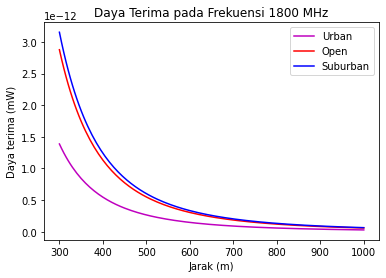

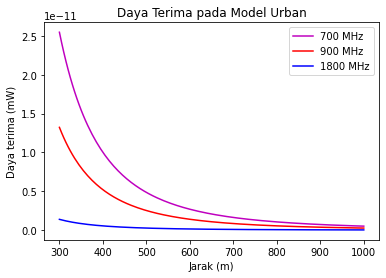

In [35]:
#GRAFIK DAYA TERIMA
def grafikpreceive_1():
  plt.figure()
  plt.plot(j,dayaterima_urban,'m', label='Urban')
  plt.plot(j,dayaterima_open,'r', label='Open')
  plt.plot(j,dayaterima_suburban,'b', label='Suburban')
  plt.legend()
  plt.title("Daya Terima pada Frekuensi 1800 MHz")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Daya terima (mW)")
  plt.show()
 
def grafikpreceive_2():
  plt.figure()
  plt.plot(j,dayaterima_700,'m', label='700 MHz')
  plt.plot(j,dayaterima_900,'r', label='900 MHz')
  plt.plot(j,dayaterima_1800,'b', label='1800 MHz')
  plt.legend()
  plt.title("Daya Terima pada Model Urban")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Daya terima (mW)")
  plt.show()

grafikpreceive_1()
grafikpreceive_2()

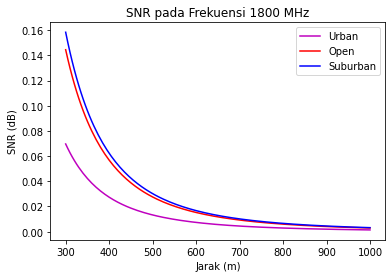

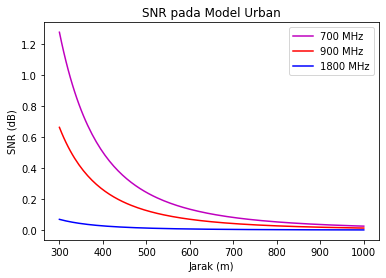

In [36]:
#GRAFIK SNR
def grafik_snr1():
  plt.figure()
  plt.plot(j,snr_urban,'m', label='Urban')
  plt.plot(j,snr_open,'r', label='Open')
  plt.plot(j,snr_suburban,'b', label='Suburban')
  plt.legend()
  plt.title("SNR pada Frekuensi 1800 MHz")
  plt.xlabel("Jarak (m)")
  plt.ylabel("SNR (dB)")
  plt.show()
 
def grafik_snr2():
  plt.figure()
  plt.plot(j,snr_700,'m', label='700 MHz')
  plt.plot(j,snr_900,'r', label='900 MHz')
  plt.plot(j,snr_1800,'b', label='1800 MHz')
  plt.legend()
  plt.title("SNR pada Model Urban")
  plt.xlabel("Jarak (m)")
  plt.ylabel("SNR (dB)")
  plt.show()

grafik_snr1()
grafik_snr2()

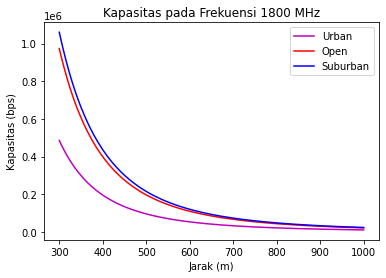

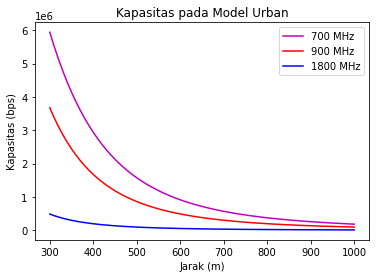

In [37]:
#GRAFIK CELLULAR CAPACITY
def grafik_cc1():
  plt.figure()
  plt.plot(j,cellcapacity_urban,'m', label='Urban')
  plt.plot(j,cellcapacity_open,'r', label='Open')
  plt.plot(j,cellcapacity_suburban,'b', label='Suburban')
  plt.legend()
  plt.title("Kapasitas pada Frekuensi 1800 MHz")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Kapasitas (bps)")
  plt.show()

def grafik_cc2():
  plt.figure()
  plt.plot(j,cellcapacity_700,'m', label='700 MHz')
  plt.plot(j,cellcapacity_900,'r', label='900 MHz')
  plt.plot(j,cellcapacity_1800,'b', label='1800 MHz')
  plt.legend()
  plt.title("Kapasitas pada Model Urban")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Kapasitas (bps)")
  plt.show()

grafik_cc1()
grafik_cc2()